# Import Libraries

In [2]:
#import the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Load Static Data

In [3]:
data = pd.read_csv(r'Static_dataset.csv')
data

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,33:51.5,18,3,0,16,0,2.338623,2,3,10,5.333333,alma,almaalomah,14,1,0
268070,36:02.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
268071,37:21.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
268072,24:25.1,16,0,0,14,0,3.249687,2,2,13,7.500000,radio,radio-vintage,14,0,0


In [4]:
data_columns = data.columns

print(data_columns)

Index(['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',
       'numeric', 'entropy', 'special', 'labels', 'labels_max',
       'labels_average', 'longest_word', 'sld', 'len', 'subdomain',
       'Target Attack'],
      dtype='object')


In [98]:
data.shape

(268074, 17)

#    Distribution of class

In [5]:
from collections import Counter
print(Counter(data['Target Attack']))

Counter({1: 147179, 0: 120895})


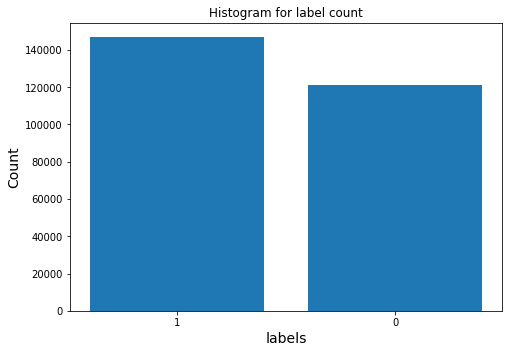

In [97]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['1', '0']
count = [147179,120895]
ax.bar(labels,count)
plt.title('Histogram for label count', fontsize=12)
plt.xlabel('labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [6]:
data_nunique_dict = data.nunique().to_dict()
data_nunique_dict

{'timestamp': 35924,
 'FQDN_count': 34,
 'subdomain_length': 24,
 'upper': 5,
 'lower': 34,
 'numeric': 13,
 'entropy': 630,
 'special': 8,
 'labels': 7,
 'labels_max': 31,
 'labels_average': 73,
 'longest_word': 6224,
 'sld': 11112,
 'len': 32,
 'subdomain': 2,
 'Target Attack': 2}

# Check if duplicate records exists

In [7]:
boolean = data['timestamp'].duplicated().any()
boolean

True

#  Kernel Disribution Estimation plot (Probability density function)

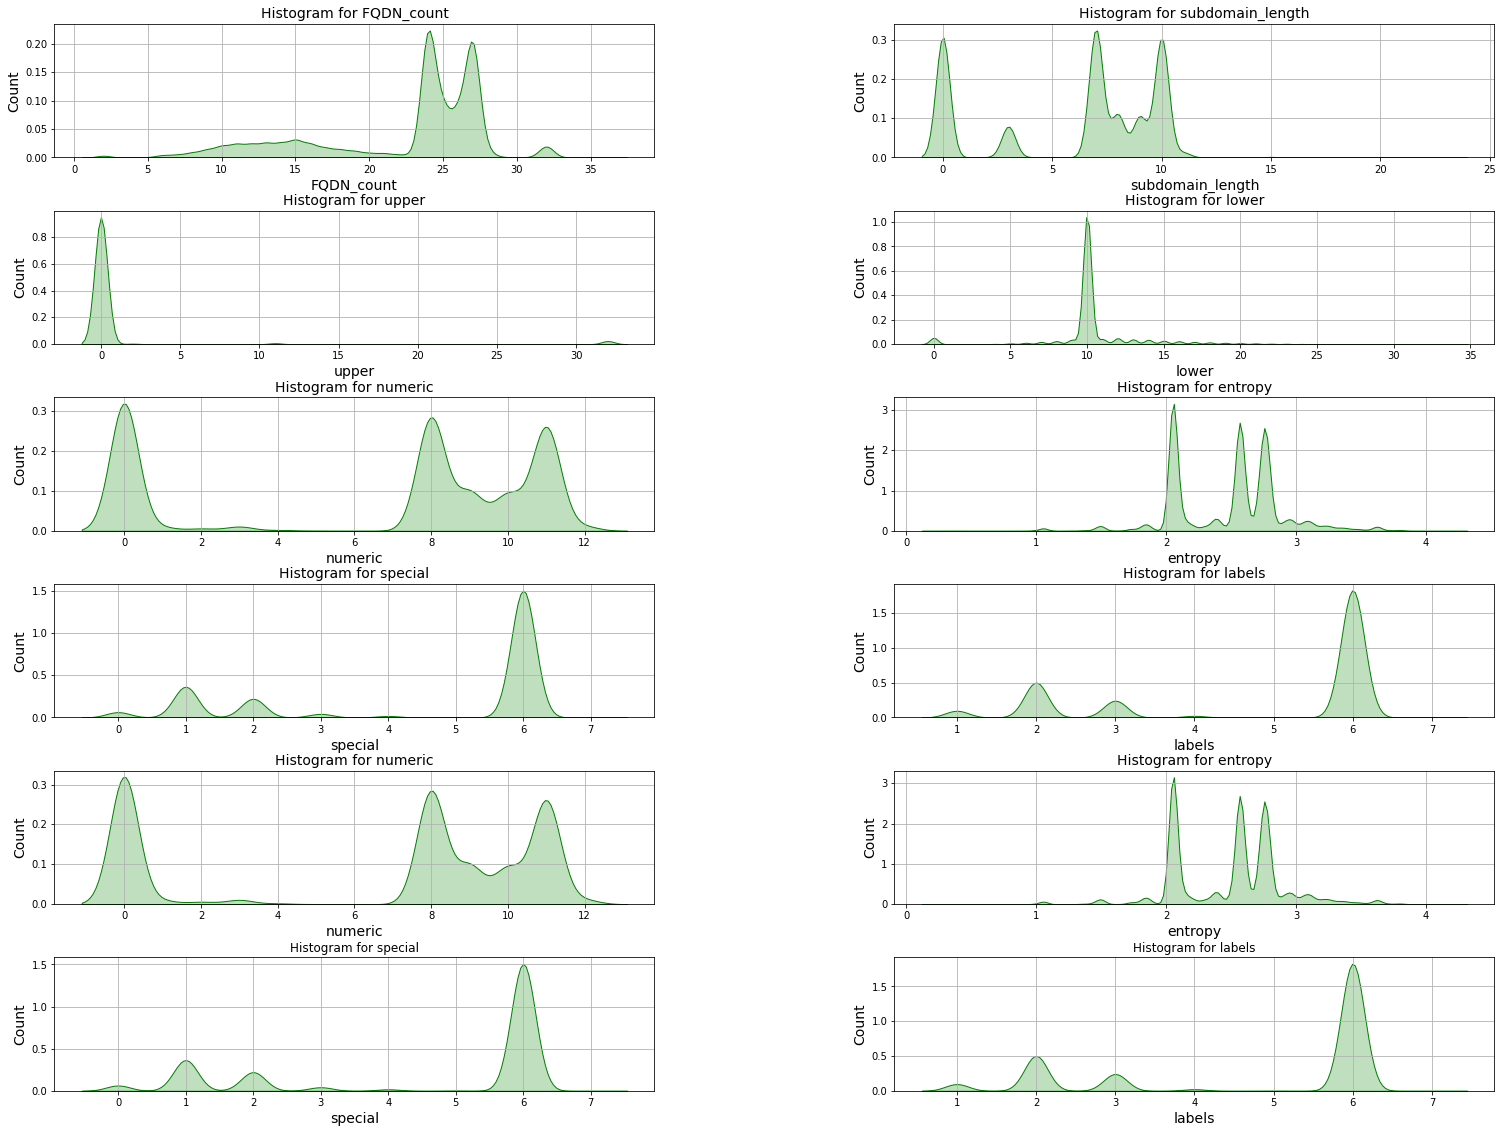

In [8]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm

figure = plt.figure(figsize= (25,25))

figure.tight_layout(pad=5.0)
# folds = [i for i in range(len(accuracy))]

plt.subplot(8, 2, 1)

# data['FQDN_count'].plot.hist(bins=12, alpha=0.5)
res = sns.kdeplot(data["FQDN_count"],color='green',shade=True)
plt.title('Histogram for FQDN_count', fontsize=14)
plt.xlabel('FQDN_count', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)



plt.subplot(8, 2, 2)
# data['subdomain_length'].plot.hist(bins=12, alpha=0.5)
res = sns.kdeplot(data["subdomain_length"],color='green',shade=True)
plt.title('Histogram for subdomain_length', fontsize=14)
plt.xlabel('subdomain_length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8,2,3)
# data['upper'].plot.hist(bins=12, alpha=0.5)
res = sns.kdeplot(data["upper"],color='green',shade=True)
plt.title('Histogram for upper', fontsize=14)
plt.xlabel('upper', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8,2,4)
res = sns.kdeplot(data["lower"],color='green',shade=True)
# data['lower'].plot.hist(bins=12, alpha=0.5)
plt.title('Histogram for lower', fontsize=14)
plt.xlabel('lower', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)


plt.subplot(8, 2, 5)
res = sns.kdeplot(data["numeric"],color='green',shade=True)
# data['numeric'].plot.hist(bins=12, alpha=0.5)
plt.title('Histogram for numeric', fontsize=14)
plt.xlabel('numeric', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)



plt.subplot(8, 2, 6)
res = sns.kdeplot(data["entropy"],color='green',shade=True)
# data['entropy'].plot.hist(bins=12, alpha=0.5)
plt.title('Histogram for entropy', fontsize=14)
plt.xlabel('entropy', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8,2,7)
res = sns.kdeplot(data["special"],color='green',shade=True)

# data['special'].plot.hist(bins=12, alpha=0.5)
plt.title('Histogram for special', fontsize=14)
plt.xlabel('special', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8,2,8)
res = sns.kdeplot(data["labels"],color='green',shade=True)

# data['labels'].plot.hist(bins=12, alpha=0.5)
plt.title('Histogram for labels', fontsize=14)
plt.xlabel('labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)


plt.subplot(8, 2, 9)
res = sns.kdeplot(data["numeric"],color='green',shade=True)
# data['numeric'].plot.hist(bins=12, alpha=0.5)
plt.title('Histogram for numeric', fontsize=14)
plt.xlabel('numeric', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)


plt.subplot(8, 2, 10)
res = sns.kdeplot(data["entropy"],color='green',shade=True)
# data['entropy'].plot.hist(bins=12, alpha=0.5)
plt.title('Histogram for entropy', fontsize=14)
plt.xlabel('entropy', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8,2,11)
res = sns.kdeplot(data["special"],color='green',shade=True)

# data['special'].plot.hist(bins=12, alpha=0.5)
plt.title('Histogram for special', fontsize=12)
plt.xlabel('special', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplot(8,2,12)
res = sns.kdeplot(data["labels"],color='green',shade=True)

# data['labels'].plot.hist(bins=12, alpha=0.5)
plt.title('Histogram for labels', fontsize=12)
plt.xlabel('labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()


# Feature engineering and data cleaning

In [9]:
data.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,33.000000,1.000000,1.000000


In [10]:
print(data.isna().sum())

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64


In [11]:
data

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,33:51.5,18,3,0,16,0,2.338623,2,3,10,5.333333,alma,almaalomah,14,1,0
268070,36:02.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
268071,37:21.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
268072,24:25.1,16,0,0,14,0,3.249687,2,2,13,7.500000,radio,radio-vintage,14,0,0


# Transforming Columns

In [12]:
data['longest_word'] = data['longest_word'].map(lambda x : int(x) if str(x).isdigit() else int(len(str(x))))

In [13]:
data

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,5,local,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,33:51.5,18,3,0,16,0,2.338623,2,3,10,5.333333,4,almaalomah,14,1,0
268070,36:02.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
268071,37:21.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
268072,24:25.1,16,0,0,14,0,3.249687,2,2,13,7.500000,5,radio-vintage,14,0,0


Adding Index

In [14]:
Index=pd.Series(np.arange(0,data.shape[0],1))
data.insert(0,"index",Index)

In [15]:
data

,index,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,5,local,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,268069,33:51.5,18,3,0,16,0,2.338623,2,3,10,5.333333,4,almaalomah,14,1,0
268070,268070,36:02.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
268071,268071,37:21.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
268072,268072,24:25.1,16,0,0,14,0,3.249687,2,2,13,7.500000,5,radio-vintage,14,0,0


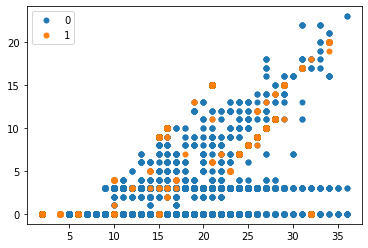

In [16]:
import matplotlib.pyplot as plt

groups = data.groupby('Target Attack')
# print(list(groups))
for name, group in groups:
    plt.plot(group['FQDN_count'], group['subdomain_length'], marker='o', linestyle='', markersize=5, label=name)

plt.legend()

# Applying label encoder on sld and timestamp columns

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['sld']= labelencoder.fit_transform(data['sld'])
data


,index,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1,1
1,1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,1
2,2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,35,13,1,0
3,3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1,1
4,4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,5,5622,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,268069,33:51.5,18,3,0,16,0,2.338623,2,3,10,5.333333,4,481,14,1,0
268070,268070,36:02.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,0
268071,268071,37:21.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,1
268072,268072,24:25.1,16,0,0,14,0,3.249687,2,2,13,7.500000,5,7880,14,0,0


In [19]:
data['timestamp']= labelencoder.fit_transform(data['timestamp'])
data


,index,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,0,33728,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1,1
1,1,4433,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,1
2,2,13928,26,9,0,10,10,2.742338,6,6,7,3.500000,2,35,13,1,0
3,3,2917,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1,1
4,4,7622,15,9,0,11,0,2.929439,4,3,5,4.333333,5,5622,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,268069,20282,18,3,0,16,0,2.338623,2,3,10,5.333333,4,481,14,1,0
268070,268070,21591,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,0
268071,268071,22381,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,1
268072,268072,14628,16,0,0,14,0,3.249687,2,2,13,7.500000,5,7880,14,0,0


In [20]:
data

,index,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,0,33728,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1,1
1,1,4433,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,1
2,2,13928,26,9,0,10,10,2.742338,6,6,7,3.500000,2,35,13,1,0
3,3,2917,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1,1
4,4,7622,15,9,0,11,0,2.929439,4,3,5,4.333333,5,5622,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,268069,20282,18,3,0,16,0,2.338623,2,3,10,5.333333,4,481,14,1,0
268070,268070,21591,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,0
268071,268071,22381,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,1
268072,268072,14628,16,0,0,14,0,3.249687,2,2,13,7.500000,5,7880,14,0,0


# Checking missing records 

In [21]:
print(data.isna().sum())

index               0
timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        0
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64


In [22]:
data_nunique_dict = data.nunique().to_dict()
data_nunique_dict

{'index': 268074,
 'timestamp': 35924,
 'FQDN_count': 34,
 'subdomain_length': 24,
 'upper': 5,
 'lower': 34,
 'numeric': 13,
 'entropy': 630,
 'special': 8,
 'labels': 7,
 'labels_max': 31,
 'labels_average': 73,
 'longest_word': 17,
 'sld': 11112,
 'len': 32,
 'subdomain': 2,
 'Target Attack': 2}

In [23]:
data = data.rename(columns = {'Target Attack': 'target_attack'}) 

In [24]:
data

,index,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,target_attack
0,0,33728,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1,1
1,1,4433,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,1
2,2,13928,26,9,0,10,10,2.742338,6,6,7,3.500000,2,35,13,1,0
3,3,2917,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1,1
4,4,7622,15,9,0,11,0,2.929439,4,3,5,4.333333,5,5622,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,268069,20282,18,3,0,16,0,2.338623,2,3,10,5.333333,4,481,14,1,0
268070,268070,21591,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,0
268071,268071,22381,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1,1
268072,268072,14628,16,0,0,14,0,3.249687,2,2,13,7.500000,5,7880,14,0,0


In [25]:
training_data =data.iloc[:,:16]

In [26]:
training_data = training_data.drop('index',axis=1)

In [27]:
training_data

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,33728,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1
1,4433,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1
2,13928,26,9,0,10,10,2.742338,6,6,7,3.500000,2,35,13,1
3,2917,27,10,0,10,11,2.570417,6,6,7,3.666667,2,35,14,1
4,7622,15,9,0,11,0,2.929439,4,3,5,4.333333,5,5622,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,20282,18,3,0,16,0,2.338623,2,3,10,5.333333,4,481,14,1
268070,21591,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1
268071,22381,27,10,0,10,11,2.767195,6,6,7,3.666667,2,35,14,1
268072,14628,16,0,0,14,0,3.249687,2,2,13,7.500000,5,7880,14,0


In [28]:
target_data = data['target_attack']

In [29]:
target_data

0         1
1         1
2         0
3         1
4         1
         ..
268069    0
268070    0
268071    1
268072    0
268073    1
Name: target_attack, Length: 268074, dtype: int64

# Train-Test Split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(training_data, target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(179609, 15) (88465, 15) (179609,) (88465,)


# Scaling the data using Min-Max Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_x_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)


scaled_x_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)


In [32]:
scaled_x_train

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,0.976171,0.647059,0.304348,0.00000,0.294118,0.666667,0.458978,0.857143,0.833333,0.166667,0.038889,0.2500,0.005131,0.290323,1.0
1,0.568048,0.735294,0.434783,0.00000,0.294118,0.916667,0.588151,0.857143,0.833333,0.166667,0.055556,0.1250,0.003150,0.387097,1.0
2,0.387245,0.235294,0.000000,0.00000,0.235294,0.000000,0.320389,0.285714,0.333333,0.033333,0.022222,0.1250,0.090549,0.064516,0.0
3,0.667567,0.647059,0.304348,0.00000,0.294118,0.666667,0.458978,0.857143,0.833333,0.166667,0.038889,0.2500,0.005131,0.290323,1.0
4,0.717145,0.382353,0.000000,0.34375,0.000000,0.250000,0.851951,0.142857,0.000000,0.433333,0.433333,0.0625,0.014401,0.451613,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179604,0.597166,0.705882,0.391304,0.00000,0.294118,0.833333,0.631156,0.857143,0.833333,0.166667,0.050000,0.1250,0.003150,0.354839,1.0
179605,0.985998,0.764706,0.478261,0.00000,0.294118,1.000000,0.496940,0.857143,0.833333,0.166667,0.061111,0.5625,0.005401,0.419355,1.0
179606,0.671547,0.735294,0.434783,0.00000,0.294118,0.916667,0.637374,0.857143,0.833333,0.166667,0.055556,0.1250,0.003150,0.387097,1.0
179607,0.631657,0.735294,0.434783,0.00000,0.294118,0.916667,0.637374,0.857143,0.833333,0.166667,0.055556,0.1250,0.003150,0.387097,1.0


# Correlation matrix

<AxesSubplot:>

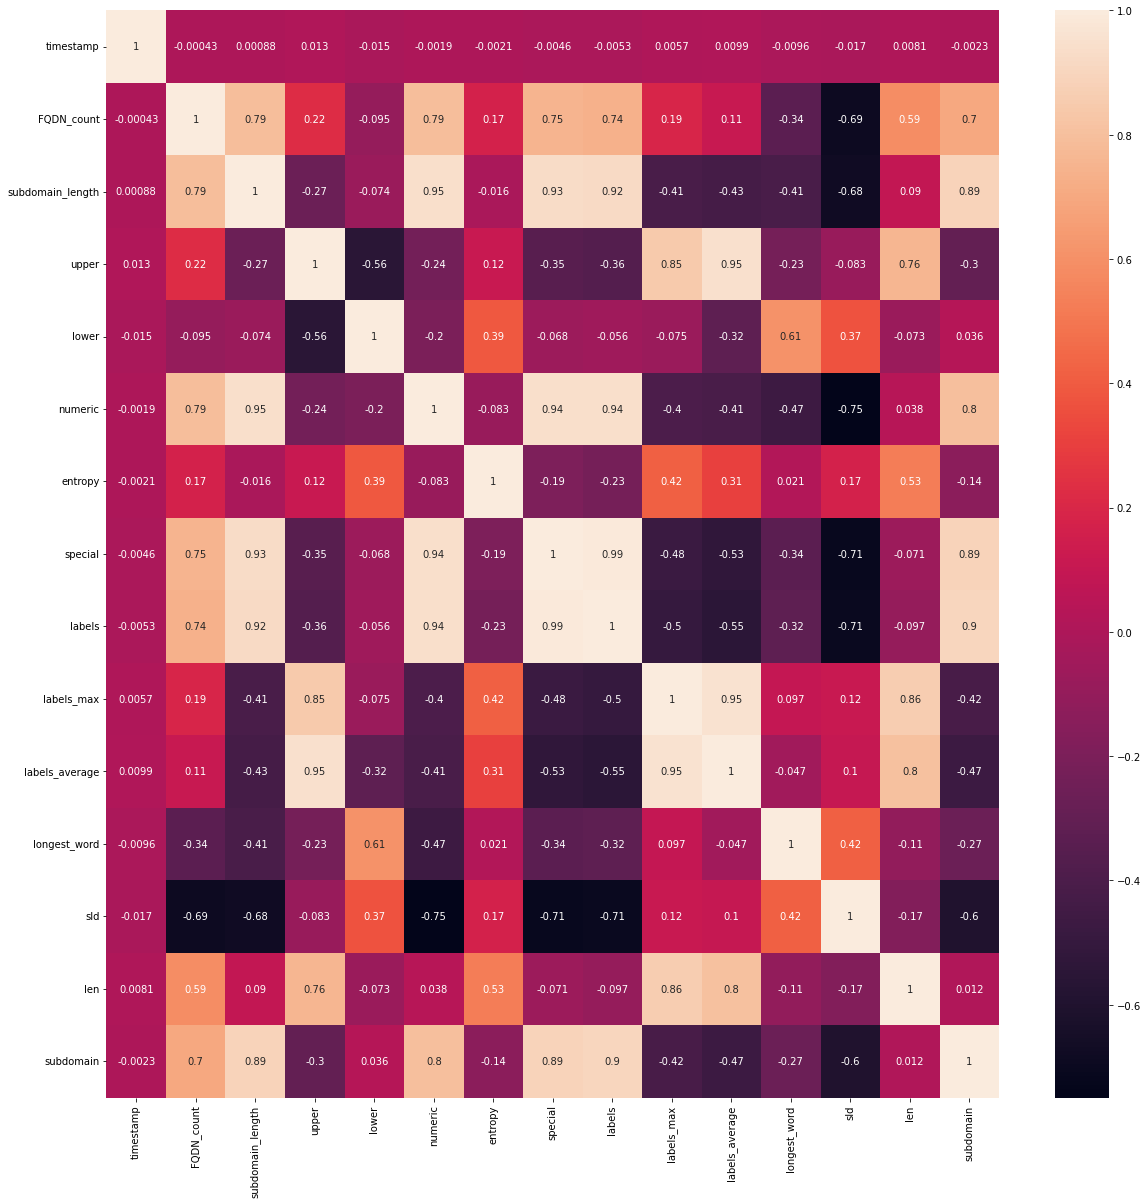

In [33]:
cor = scaled_x_train.corr()
plt.figure(figsize = (20,20))
sns.heatmap(cor, annot=True)

# Feature Selection 

# Chi-Sqaure test

In [34]:
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

test = SelectKBest(score_func=chi2,k=4)
fit = test.fit(scaled_x_train,Y_train)
fit.scores_


array([2.26221268e+00, 2.97681246e+03, 6.40356785e+03, 8.72785275e+02,
       4.57814500e+02, 1.67371106e+04, 4.61939609e+01, 9.15899383e+03,
       8.30546062e+03, 1.70438973e+02, 2.60031851e+02, 1.11710105e+03,
       2.76351923e+04, 2.44771739e+02, 1.11404059e+04])

In [35]:
p_val_1 = pd.Series(fit.scores_)
p_val_1.index = scaled_x_train.columns
p_val_1


timestamp               2.262213
FQDN_count           2976.812460
subdomain_length     6403.567848
upper                 872.785275
lower                 457.814500
numeric             16737.110558
entropy                46.193961
special              9158.993833
labels               8305.460617
labels_max            170.438973
labels_average        260.031851
longest_word         1117.101052
sld                 27635.192274
len                   244.771739
subdomain           11140.405905
dtype: float64

In [36]:
p_val_1=p_val_1.sort_values(ascending=False)

In [99]:
p_val_1

sld                 27635.192274
numeric             16737.110558
subdomain           11140.405905
special              9158.993833
labels               8305.460617
subdomain_length     6403.567848
FQDN_count           2976.812460
longest_word         1117.101052
upper                 872.785275
lower                 457.814500
labels_average        260.031851
len                   244.771739
labels_max            170.438973
entropy                46.193961
timestamp               2.262213
dtype: float64

<AxesSubplot:>

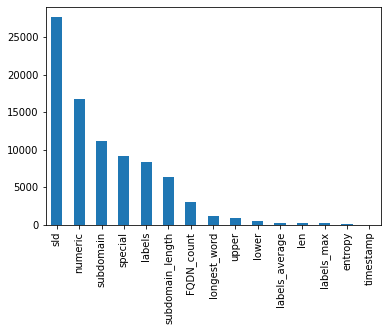

In [37]:
p_val_1.plot.bar()


In [38]:
from sklearn.feature_selection import f_classif

In [39]:
from sklearn.feature_selection import SelectKBest

In [40]:
dependent_features=scaled_x_train.columns

Feature timestamp: 13.732691
Feature FQDN_count: 83567.379217
Feature subdomain_length: 87255.575683
Feature upper: 971.953245
Feature lower: 17221.088840
Feature numeric: 100619.216858
Feature entropy: 2552.369674
Feature special: 91845.451318
Feature labels: 85974.465251
Feature labels_max: 1651.256064
Feature labels_average: 1048.948434
Feature longest_word: 22056.794757
Feature sld: 79674.331960
Feature len: 4708.407873
Feature subdomain: 60459.870804


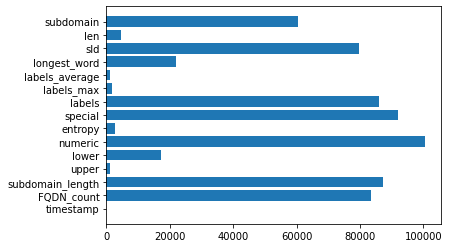

In [41]:
feature_selection = SelectKBest(score_func=f_classif, k='all')
feature_selection.fit(scaled_x_train, Y_train.values.ravel())


X_train_fs = feature_selection.transform(scaled_x_train)
X_test_fs = feature_selection.transform(scaled_x_test)

for i in range(len(feature_selection.scores_)):
    print('Feature %s: %f' % (dependent_features[i], feature_selection.scores_[i]))
# plot the scores
plt.barh([i for i in dependent_features], feature_selection.scores_)
plt.show()

# Information Gain

In [42]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [43]:
full_data = scaled_x_train
full_target_data = Y_train.copy()

In [44]:
full_data

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain
0,0.976171,0.647059,0.304348,0.00000,0.294118,0.666667,0.458978,0.857143,0.833333,0.166667,0.038889,0.2500,0.005131,0.290323,1.0
1,0.568048,0.735294,0.434783,0.00000,0.294118,0.916667,0.588151,0.857143,0.833333,0.166667,0.055556,0.1250,0.003150,0.387097,1.0
2,0.387245,0.235294,0.000000,0.00000,0.235294,0.000000,0.320389,0.285714,0.333333,0.033333,0.022222,0.1250,0.090549,0.064516,0.0
3,0.667567,0.647059,0.304348,0.00000,0.294118,0.666667,0.458978,0.857143,0.833333,0.166667,0.038889,0.2500,0.005131,0.290323,1.0
4,0.717145,0.382353,0.000000,0.34375,0.000000,0.250000,0.851951,0.142857,0.000000,0.433333,0.433333,0.0625,0.014401,0.451613,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179604,0.597166,0.705882,0.391304,0.00000,0.294118,0.833333,0.631156,0.857143,0.833333,0.166667,0.050000,0.1250,0.003150,0.354839,1.0
179605,0.985998,0.764706,0.478261,0.00000,0.294118,1.000000,0.496940,0.857143,0.833333,0.166667,0.061111,0.5625,0.005401,0.419355,1.0
179606,0.671547,0.735294,0.434783,0.00000,0.294118,0.916667,0.637374,0.857143,0.833333,0.166667,0.055556,0.1250,0.003150,0.387097,1.0
179607,0.631657,0.735294,0.434783,0.00000,0.294118,0.916667,0.637374,0.857143,0.833333,0.166667,0.055556,0.1250,0.003150,0.387097,1.0


In [45]:
full_target_data

10260     1
140075    0
72859     0
138994    1
117392    1
         ..
100661    0
179683    1
98645     0
113736    1
239522    1
Name: target_attack, Length: 179609, dtype: int64

In [46]:
importances = full_data.apply(lambda x: x.corr(full_target_data))
indices = np.argsort(importances)
print(importances[indices])

numeric            -0.002037
labels             -0.001712
lower              -0.001277
timestamp          -0.001252
special            -0.000855
FQDN_count         -0.000593
subdomain_length    0.000009
subdomain           0.000430
labels_max          0.001250
longest_word        0.001681
labels_average      0.002003
len                 0.002230
upper               0.002348
entropy             0.002668
sld                 0.002678
dtype: float64


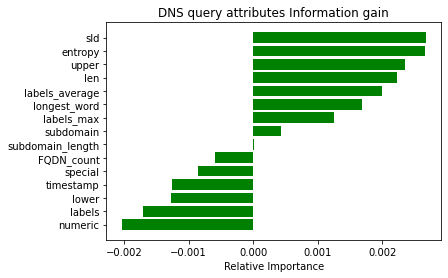

In [47]:
names=full_data.columns
plt.title('DNS query attributes Information gain')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Plotting results from Chi-Sqaure, ANOVA  test and Mutual Information Gain test

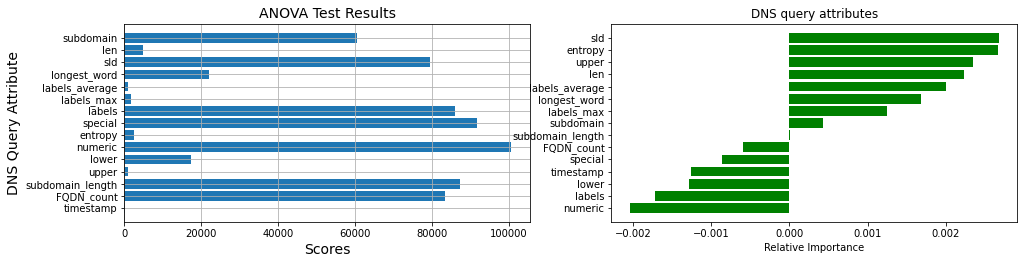

<Figure size 432x288 with 0 Axes>

In [53]:
figure = plt.figure(figsize= (16,8))

figure.tight_layout(pad=5.0)
# folds = [i for i in range(len(accuracy))]

plt.subplot(2, 2, 1)
plt.barh([i for i in dependent_features], feature_selection.scores_)
plt.title('ANOVA Test Results', fontsize=14)
plt.xlabel('Scores', fontsize=14)
plt.ylabel('DNS Query Attribute', fontsize=14)
plt.grid(True)



plt.subplot(2,2,2)
names=full_data.columns
plt.title('DNS query attributes')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

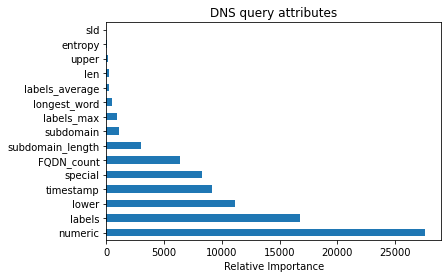

In [54]:

p_val_1.plot.barh()
plt.title('DNS query attributes')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [55]:
for i in range(0, len(indices)):
    if np.abs(importances[i])>0.001:
        print(full_data.columns[i])

timestamp
upper
lower
numeric
entropy
labels
labels_max
labels_average
longest_word
sld
len


Following input variables are chosen for the final model training:

timestamp,
upper,
lower,
numeric,
entropy,
labels,
labels_max,
labels_average,
longest_word,
sld,
len,

# Performing Feature Selection 

In [56]:
training_data_after_fs = training_data[['timestamp','subdomain_length','lower','numeric','entropy','special','labels','labels_max','longest_word','sld','len','subdomain']]

In [57]:
training_data_after_fs

,timestamp,subdomain_length,lower,numeric,entropy,special,labels,labels_max,longest_word,sld,len,subdomain
0,33728,10,10,11,2.570417,6,6,7,2,35,14,1
1,4433,10,10,11,2.767195,6,6,7,2,35,14,1
2,13928,9,10,10,2.742338,6,6,7,2,35,13,1
3,2917,10,10,11,2.570417,6,6,7,2,35,14,1
4,7622,9,11,0,2.929439,4,3,5,5,5622,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...
268069,20282,3,16,0,2.338623,2,3,10,4,481,14,1
268070,21591,10,10,11,2.767195,6,6,7,2,35,14,1
268071,22381,10,10,11,2.767195,6,6,7,2,35,14,1
268072,14628,0,14,0,3.249687,2,2,13,5,7880,14,0


# Train-test split

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(training_data_after_fs, target_data, test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(179609, 12) (88465, 12) (179609,) (88465,)


# Performing Min-max scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_x_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)


scaled_x_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)


In [60]:
scaled_x_train

,timestamp,subdomain_length,lower,numeric,entropy,special,labels,labels_max,longest_word,sld,len,subdomain
0,0.747070,0.304348,0.294118,0.666667,0.458978,0.857143,0.833333,0.166667,0.2500,0.005130,0.266667,1.0
1,0.684826,0.434783,0.294118,0.916667,0.637374,0.857143,0.833333,0.166667,0.1250,0.003150,0.366667,1.0
2,0.592740,0.000000,0.352941,0.000000,0.686384,0.142857,0.166667,0.266667,0.3750,0.474935,0.266667,0.0
3,0.896863,0.304348,0.294118,0.666667,0.458978,0.857143,0.833333,0.166667,0.2500,0.005130,0.266667,1.0
4,0.115692,0.000000,0.294118,0.000000,0.476731,0.142857,0.166667,0.166667,0.1875,0.829268,0.166667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
179604,0.756062,0.434783,0.294118,0.916667,0.588151,0.857143,0.833333,0.166667,0.1250,0.003150,0.366667,1.0
179605,0.643237,0.000000,0.000000,0.000000,0.614193,0.000000,0.000000,1.000000,0.0625,0.014850,1.000000,0.0
179606,0.868831,0.304348,0.294118,0.666667,0.458978,0.857143,0.833333,0.166667,0.2500,0.005130,0.266667,1.0
179607,0.402444,0.000000,0.294118,0.000000,0.400637,0.142857,0.166667,0.100000,0.1875,0.710737,0.100000,0.0


In [61]:
scaled_x_test

,timestamp,subdomain_length,lower,numeric,entropy,special,labels,labels_max,longest_word,sld,len,subdomain
0,0.904267,0.304348,0.294118,0.666667,0.458978,0.857143,0.833333,0.166667,0.2500,0.005130,0.266667,1.0
1,0.122289,0.434783,0.294118,0.916667,0.588151,0.857143,0.833333,0.166667,0.1250,0.003150,0.366667,1.0
2,0.410099,0.000000,0.205882,0.000000,0.209485,0.285714,0.333333,0.033333,0.1250,0.999280,0.000000,0.0
3,0.925145,0.130435,0.264706,0.000000,0.601804,0.285714,0.333333,0.066667,0.1250,0.349293,0.166667,1.0
4,0.587618,0.000000,0.323529,0.000000,0.462265,0.142857,0.166667,0.200000,0.1875,0.653587,0.200000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
88460,0.763494,0.000000,0.235294,0.000000,0.409827,0.285714,0.333333,0.066667,0.2500,0.171632,0.066667,0.0
88461,0.063191,0.434783,0.294118,0.916667,0.637374,0.857143,0.833333,0.166667,0.1250,0.003150,0.366667,1.0
88462,0.308354,0.347826,0.294118,0.750000,0.584705,0.857143,0.833333,0.166667,0.1250,0.003150,0.300000,1.0
88463,0.092169,0.434783,0.294118,0.916667,0.588151,0.857143,0.833333,0.166667,0.1250,0.003150,0.366667,1.0


#  K- Fold Cross Validation

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

def Plot_graph(accuracy,precision,f1_score_measure,recall):
    figure = plt.figure(figsize= (16,8))
    
    figure.tight_layout(pad=5.0)
    folds = [i for i in range(len(accuracy))]
    
    plt.subplot(2, 2, 1)
    plt.plot(folds, accuracy,color='red', marker='o')
    plt.title('accuracy Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('accuracy', fontsize=14)
    plt.grid(True)
    
    plt.subplot(2, 2, 2)
    plt.plot(folds, precision,color='red', marker='o')
    plt.title('precision Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('precision', fontsize=14)
    plt.grid(True)
    
    plt.subplot(2,2,3)
    plt.plot(folds, recall,color='red', marker='o')
    plt.title('recall Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('recall', fontsize=14)
    plt.grid(True)
    
    plt.subplot(2,2,4)
    plt.plot(folds, f1_score_measure,color='red', marker='o')
    plt.title('f1_score Vs folds', fontsize=14)
    plt.xlabel('folds', fontsize=14)
    plt.ylabel('f1_score', fontsize=14)
    plt.grid(True)
    
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)
    plt.show()

def get_mean(accuracy,error,precision,f1_score_measure,recall):
    
    print("Mean Accuracy for Random Forest Classifier: ", mean(accuracy))
    print("Mean precision for Random Forest Classifier: ", mean(precision))
    print("Mean recall for Random Forest Classifier: ", mean(recall))
    print("Mean f1_score for Random Forest Classifier: ", mean(f1_score_measure))
    
def K_Fold_With_Dataset(scaled_x_train,clf,sampling=None):
    kfold = KFold(n_splits=10, shuffle=False)
    error=[]
    accuracy=[]
    precision=[]
    recall=[]
    f1_score_measure=[]
    for train_index, test_index in kfold.split(scaled_x_train):
        xtrain,xtest = scaled_x_train.iloc[train_index],scaled_x_train.iloc[test_index]
        ytrain,ytest = Y_train.iloc[train_index],Y_train.iloc[test_index]
        
        rf1 = clf
        if sampling=='Oversample':
            oversample = SMOTE()
            X_DB1, Y_DB1 = oversample.fit_resample(xtrain, ytrain)
            rf1=rf1.fit(X_DB1, Y_DB1)
            
        elif sampling=='Undersample':
            undersample = EditedNearestNeighbours()
            X_DB2, Y_DB2 = undersample.fit_resample(xtrain, ytrain)
            rf1=rf1.fit(X_DB2, Y_DB2)
        else:
            rf1=rf1.fit(xtrain, ytrain)
        
        
        RF_predictions = rf1.predict(xtest)
        
        error.append(mean_squared_error(ytest,RF_predictions))
        accuracy.append(accuracy_score(ytest, RF_predictions))
        precision.append(precision_score(ytest, RF_predictions))
        recall.append(recall_score(ytest, RF_predictions))
        f1_score_measure.append(f1_score(ytest, RF_predictions))
        
        
    get_mean(accuracy,error,precision,f1_score_measure,recall)
    Plot_graph(accuracy,precision,f1_score_measure,recall)

# Applying K-Fold on Models

# Random Forest 

Mean Accuracy for Random Forest Classifier:  0.8256378767458173
Mean precision for Random Forest Classifier:  0.7596894173250279
Mean recall for Random Forest Classifier:  0.9984905430138272
Mean f1_score for Random Forest Classifier:  0.8628652491756128


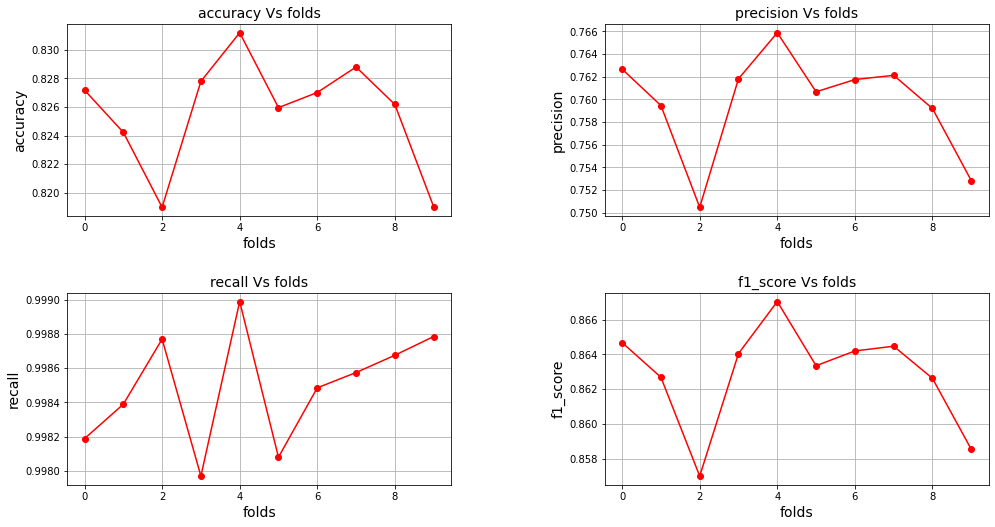

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from statistics import mean
rf1 = RandomForestClassifier(n_estimators=100, 
                            max_depth=5,
                            max_features='sqrt', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
K_Fold_With_Dataset(scaled_x_train,rf1,sampling=None)

# Random Forest - Oversampled

Mean Accuracy for Random Forest Classifier:  0.825632309127088
Mean precision for Random Forest Classifier:  0.7596875813895649
Mean recall for Random Forest Classifier:  0.9984804430239272
Mean f1_score for Random Forest Classifier:  0.8628602845747302


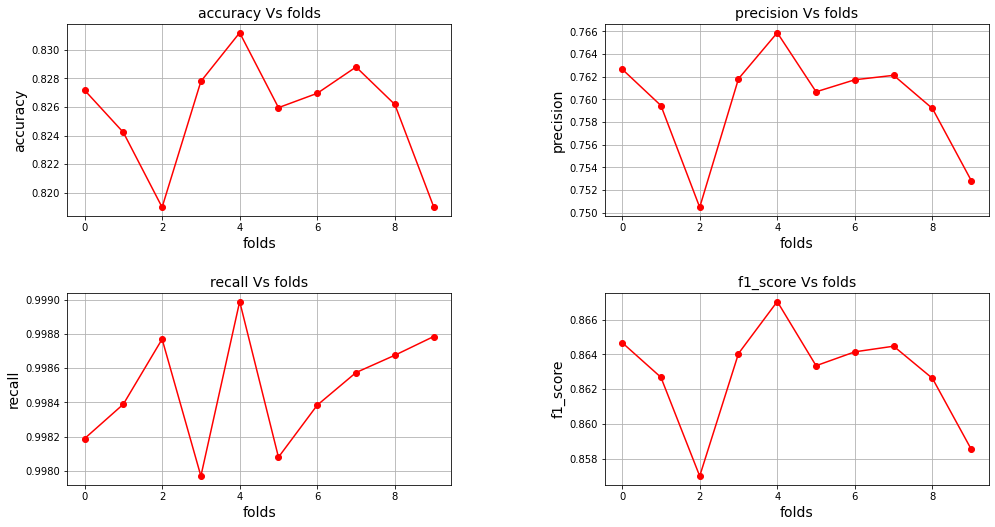

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf1 = RandomForestClassifier(n_estimators=100, 
                            max_depth=5,
                            max_features='sqrt', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)
K_Fold_With_Dataset(scaled_x_train,rf1,sampling="Oversample")

# KNN 

Mean Accuracy for Random Forest Classifier:  0.8146807513160474
Mean precision for Random Forest Classifier:  0.7663473168524203
Mean recall for Random Forest Classifier:  0.9533392821104002
Mean f1_score for Random Forest Classifier:  0.8496705302864098


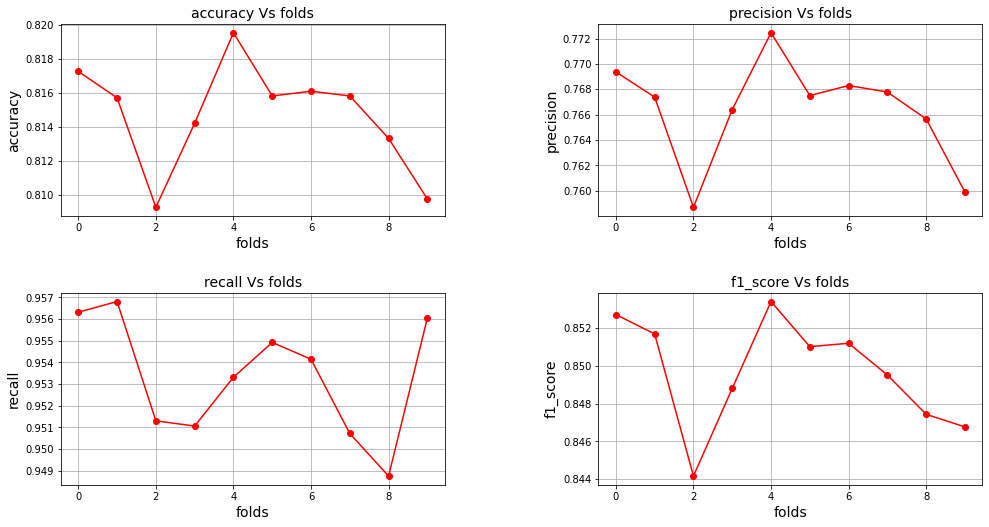

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

rf1 = KNeighborsClassifier(n_neighbors=9,p=2,metric='minkowski')
K_Fold_With_Dataset(scaled_x_train,rf1,sampling=None)

# XGBoost

Mean Accuracy for Random Forest Classifier:  0.8267291337368059
Mean precision for Random Forest Classifier:  0.7606479221803278
Mean recall for Random Forest Classifier:  0.9989770615575889
Mean f1_score for Random Forest Classifier:  0.8636642235364813


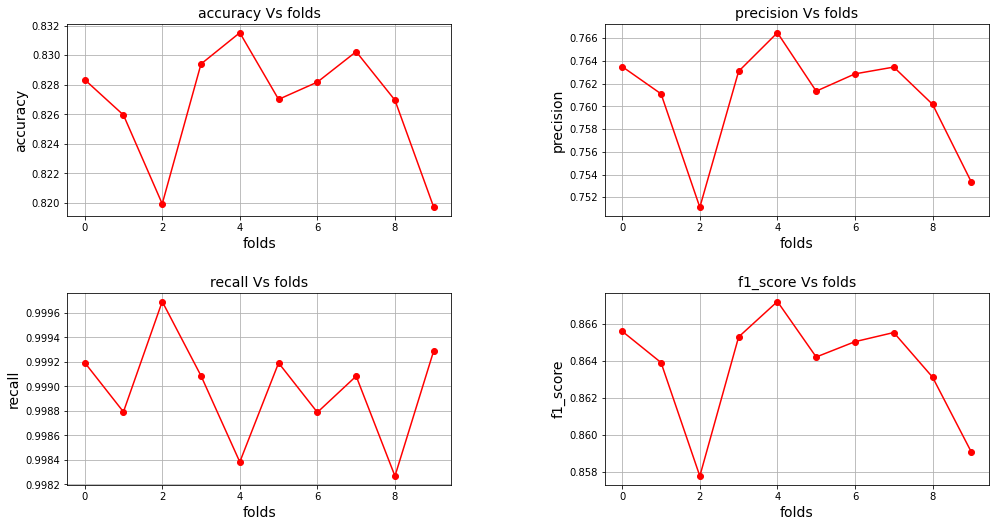

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

rf1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
K_Fold_With_Dataset(scaled_x_train,rf1,sampling=None)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

DT = DecisionTreeClassifier()
DT.fit(scaled_x_train,Y_train)
DT_predictions=DT.predict(scaled_x_test)

DT_accuracy = accuracy_score(Y_test, DT_predictions)
DT_precision = precision_score(Y_test, DT_predictions)
DT_recall = recall_score(Y_test, DT_predictions)

In [ ]:
print("Accuracy: ", DT_accuracy,"\nprecision",DT_precision,"\nRecall", DT_recall)

In [ ]:
import seaborn as sns
fig = plt.figure()

cf_matrix_DT = confusion_matrix(Y_test, DT_predictions)
print(cf_matrix_DT)
ax = sns.heatmap(cf_matrix_DT, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix with Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.show()

# Random Forest Model 

In [69]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RF=RandomForestClassifier(n_estimators=1000, 
                    max_depth=5,
                    max_features='sqrt', 
                    bootstrap=True, 
                    n_jobs=-1, 
                    random_state=42)


RF.fit(scaled_x_train,Y_train)
RF_predictions=RF.predict(scaled_x_test)

RF_accuracy = accuracy_score(Y_test, RF_predictions)
RF_precision = precision_score(Y_test, RF_predictions)
RF_recall = recall_score(Y_test, RF_predictions)


In [71]:
print("Accuracy: ", RF_accuracy,"\nprecision",RF_precision,"\nRecall", RF_recall)

Accuracy:  0.8251398858305544 
precision 0.7587524867244161 
Recall 0.9985981115738259


# saving model

In [72]:
import pickle
pickle.dump(RF, open('RF_static_12_11.pkl', 'wb'))

[[24558 15401]
 [   68 48438]]


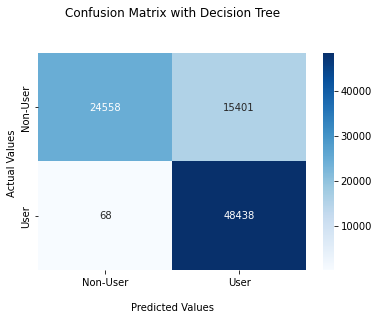

In [73]:
import seaborn as sns
fig = plt.figure()

cf_matrix_RF = confusion_matrix(Y_test, RF_predictions)
print(cf_matrix_RF)
ax = sns.heatmap(cf_matrix_RF, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix with Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.show()

# KNN 

In [74]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(scaled_x_train,Y_train)
KNN_predictions=KNN.predict(scaled_x_test)

KNN_accuracy = accuracy_score(Y_test, KNN_predictions)
KNN_precision = precision_score(Y_test, KNN_predictions)
KNN_recall = recall_score(Y_test, KNN_predictions)

In [75]:
print("Accuracy: ", KNN_accuracy,"\nprecision",KNN_precision,"\nRecall", KNN_recall)

Accuracy:  0.8138472842367038 
precision 0.7652503642866605 
Recall 0.9527687296416938


[[25782 14177]
 [ 2291 46215]]


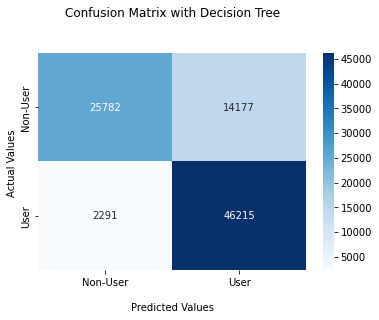

In [76]:
import seaborn as sns
fig = plt.figure()

cf_matrix_KNN = confusion_matrix(Y_test, KNN_predictions)
print(cf_matrix_KNN)
ax = sns.heatmap(cf_matrix_KNN, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix with Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.show()

# XGBoost

In [92]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb_model_1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_model_1.fit(scaled_x_train,Y_train)

XGB_predictions = xgb_model_1.predict(scaled_x_test)

# print(XGB_predictions)

In [93]:
XGB_accuracy = accuracy_score(Y_test, XGB_predictions)
XGB_precision = precision_score(Y_test, XGB_predictions)
XGB_recall = recall_score(Y_test, XGB_predictions)

In [94]:
print("Accuracy: ", XGB_accuracy,"\nprecision",XGB_precision,"\nRecall", XGB_recall)

Accuracy:  0.8262363646639914 
precision 0.7597930061157284 
Recall 0.9988867356615676


# Save Model

In [80]:
import pickle
pickle.dump(xgb_model, open('xgb_model_static_12_11.pkl', 'wb'))

In [82]:
loaded_model = pickle.load(open('xgb_model_static_12_11.pkl', 'rb'))
result = loaded_model.score(scaled_x_test, Y_test)
print(result)

0.8262363646639914


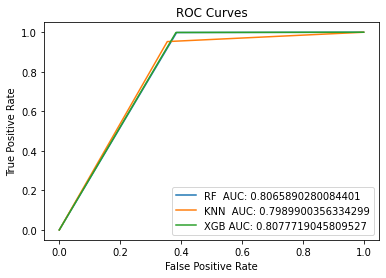

In [100]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = metrics.roc_curve(Y_test,  RF_predictions)
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  KNN_predictions)
fpr2, tpr2, _ = metrics.roc_curve(Y_test,  XGB_predictions)

#create ROC curve
plt.plot(fpr,tpr, label="RF  AUC: "+str(roc_auc_score(Y_test,  RF_predictions)))
plt.plot(fpr1,tpr1, label="KNN  AUC: "+str(roc_auc_score(Y_test,  KNN_predictions)))
plt.plot(fpr2,tpr2, label="XGB AUC: "+str(roc_auc_score(Y_test,  XGB_predictions)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curves')
plt.legend(loc=4)
plt.show()